# Demos: Lecture 13

## Demo 1: gradient of a quantum circuit

<img src="fig/pauliz_opt.png" width="400px">

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


/opt/conda/envs/pennylane/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def pqc(theta):
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

In [4]:
theta_values = np.linspace(0, 2 * np.pi, 300)

In [4]:
circuit_outputs = [pqc(theta) for theta in theta_values]

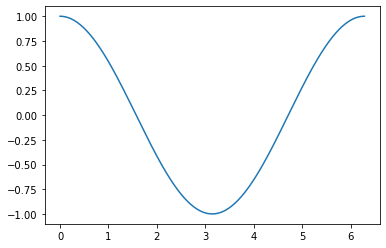

In [11]:
plt.plot(theta_values, circuit_outputs)

In [8]:
grad_fn = qml.grad(pqc)

In [9]:
gradient_values = [grad_fn(theta) for theta in theta_values]

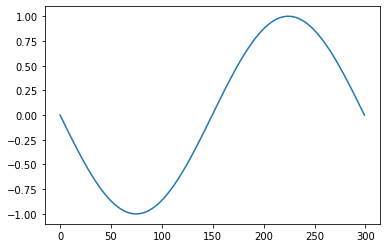

In [10]:
plt.plot(gradient_values)

## Demo 2: training a small PQC

In [18]:
opt = qml.GradientDescentOptimizer()

# Choose some starting value for theta
theta = np.array(0.8, requires_grad=True)

costs = []
thetas = []

# Iterate
for _ in range(200):
    theta, _cost = opt.step_and_cost(pqc, theta)
    costs.append(_cost)
    thetas.append(theta)

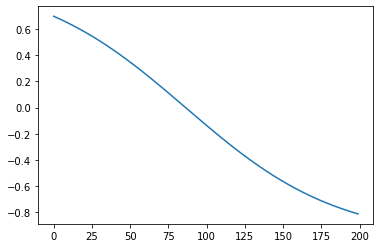

In [19]:
plt.plot(costs)

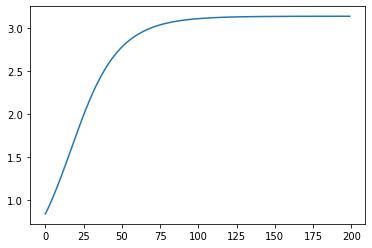

In [17]:
plt.plot(thetas)

## Demo 3: parameter-shift rules

In [5]:
param_shift_values = [
    0.5 * (pqc(theta + np.pi/2) - pqc(theta - np.pi/2)) for theta in theta_values
]

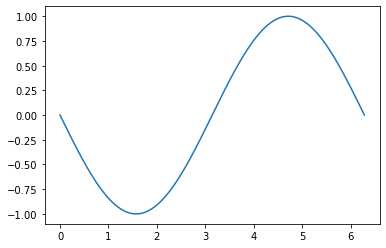

In [6]:
plt.plot(theta_values, param_shift_values)

## Demo 4: multi-parameter circuits

<img src="fig/two_param_opt.png">

In [10]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def pqc_2(theta, phi):
    qml.RY(theta, wires=0)
    qml.RX(phi, wires=1)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 0])
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))

In [11]:
grad_fn = qml.grad(pqc_2)

theta = np.array(0.3, requires_grad=True)
phi = np.array(0.4, requires_grad=True)

In [12]:
grad_fn(theta, phi)

(array(0.87992318), array(-0.11508099))

In [13]:
0.5 * (pqc_2(theta + np.pi/2, phi) - pqc_2(theta - np.pi/2, phi))

tensor(0.87992318, requires_grad=True)

In [16]:
0.5 * (pqc_2(theta, phi + np.pi / 2) - pqc_2(theta, phi - np.pi/2))

tensor(-0.11508099, requires_grad=True)

In [17]:
opt = qml.GradientDescentOptimizer(stepsize=0.05)

costs = []
thetas = []
phis = []

for _ in range(100):
    (theta, phi), _cost = opt.step_and_cost(pqc_2, theta, phi)
    costs.append(_cost)
    thetas.append(theta)
    phis.append(phi)

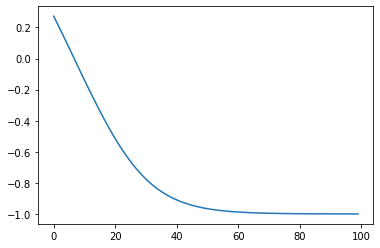

In [18]:
plt.plot(costs)

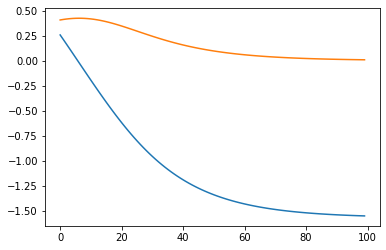

In [19]:
plt.plot(thetas)
plt.plot(phis)

## Demo 5: changing up the cost function

In [20]:
def cost(theta, phi):
    return (pqc_2(theta, phi) - 0.2) ** 2

In [21]:
opt = qml.GradientDescentOptimizer(stepsize=0.05)

costs = []
thetas = []
phis = []

theta = np.array(0.1, requires_grad=True)
phi = np.array(0.1, requires_grad=True)

for _ in range(100):
    (theta, phi), _cost = opt.step_and_cost(cost, theta, phi)
    
    costs.append(_cost)
    thetas.append(theta)
    phis.append(phi)

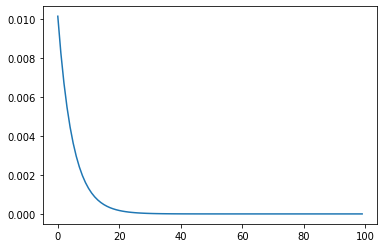

In [22]:
plt.plot(costs)

In [23]:
pqc_2(theta, phi)

tensor(0.19999556, requires_grad=True)

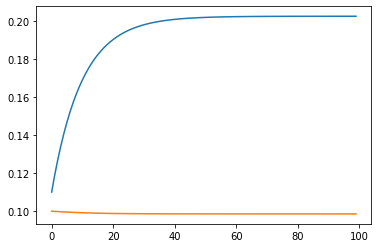

In [24]:
plt.plot(thetas)
plt.plot(phis)